In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
df = pd.read_csv(f'../../data/processed_filtered/formality/formality_train_cross_predict_paraphrases.csv')
df.head()

,text,label,paraphrased1,paraphrased2,paraphrased3,pred_formality_orig,pred_emo_orig,pred_formality_paraphrased1,pred_emo_paraphrased1,pred_formality_paraphrased2,pred_emo_paraphrased2,pred_formality_paraphrased3,pred_emo_paraphrased3
0,uhh nobody cause hes butttttt ugly can you rea...,0,you can't read it or ru a stupid like him.,you can't read it or ru a stupid man like him.,you can't read it or ru a stupid man as he is.,0.006100,0.070406,0.042595,0.229257,0.094206,0.301265,0.211996,0.276247
1,but dont force it on her,0,but don't force her to force her.,but don't force her to force her to force her.,but she won't force her to force her.,0.006934,0.078063,0.273766,0.888613,0.284559,0.859521,0.246601,0.722908
2,im 8 and I like tom felton and he is 18 how sh...,0,I'm 8 and I like him and he's 18 and I'm 8 and...,I'm 8 and he's 18 and I like him and he's 18 a...,I'm 8 and he's 18 and I like him and he's 18 h...,0.007105,0.478182,0.174641,0.978216,0.101648,0.931620,0.032833,0.914340
3,I can't even visit her or nothin and she lives...,0,"I'm not going to visit her, and she's upstairs!","I'm not going to visit her, and she lives upst...","I'm not going to visit her, and she's upstairs.",0.031575,0.279384,0.630340,0.182866,0.790691,0.231102,0.779721,0.101894
4,"Sadly, the man was from Spain and not from Mex...",1,"unfortunately, the man came from Spain and not...","unfortunately, he's not from Mexico, but from ...","unfortunately he was from Spain, not Mexico.",0.986369,0.144362,0.983810,0.494974,0.932479,0.524222,0.948339,0.124877


In [3]:
df2 = pd.read_csv(f'../../data/processed_filtered/formality/formality_full_deduped_train_cross_predict_paraphrases.csv')
df2.head()

,text,label,paraphrased1,paraphrased2,paraphrased3,pred_formality_orig,pred_emo_orig,pred_formality_paraphrased1,pred_emo_paraphrased1,pred_formality_paraphrased2,pred_emo_paraphrased2,pred_formality_paraphrased3,pred_emo_paraphrased3
0,"If I knew, and I were his bride. I love them!",1,"if I knew, I was his bride.","if I knew, I'd be his bride.","I knew he was his bride, and I was his bride.",0.765852,0.975114,0.766624,0.896295,0.554712,0.957648,0.909025,0.975417
1,"If not, then get a new girl freind.",0,"if you don't, you'll have a new girl.","if you don't, you'll get a new woman.","if you don't, you'll have a new woman.",0.073414,0.769469,0.483921,0.933990,0.519654,0.941463,0.590957,0.938880
2,"in my place, the scientist, and green eyes.",0,the scientist and the green eyes in my place.,the scientist and green eyes in my place.,"in my place, scientist, green eyes.",0.821684,0.971560,0.658085,0.822261,0.611394,0.872063,0.394996,0.973492
3,"I have not seen it, but I would like to.",1,"I didn't see it, but I'd like to.","I didn't see him, but I'd like to.","I didn't see it, but I'd like it.",0.990478,0.914950,0.580598,0.926043,0.639987,0.871931,0.451492,0.972602
4,I would not recommend going to prison.,1,I wouldn't recommend going to jail.,I'm not recommending going to jail.,I'm not recommending going to prison for you.,0.991620,0.690595,0.686255,0.909547,0.834320,0.466666,0.911641,0.714514


In [4]:
df = pd.concat([df,df2], axis=0)

<AxesSubplot:>

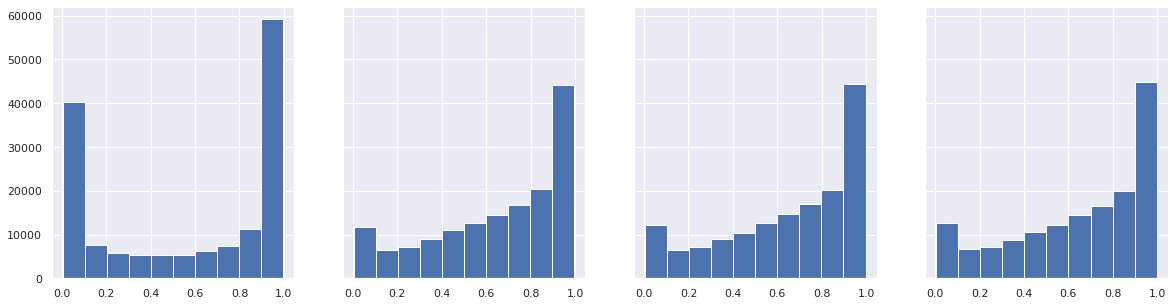

In [5]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(ncols=4, sharey=True)
df['pred_formality_orig'].hist(bins=10, ax=ax1)
df['pred_formality_paraphrased1'].hist(bins=10, ax=ax2)
df['pred_formality_paraphrased2'].hist(bins=10, ax=ax3)
df['pred_formality_paraphrased3'].hist(bins=10, ax=ax4)

<AxesSubplot:>

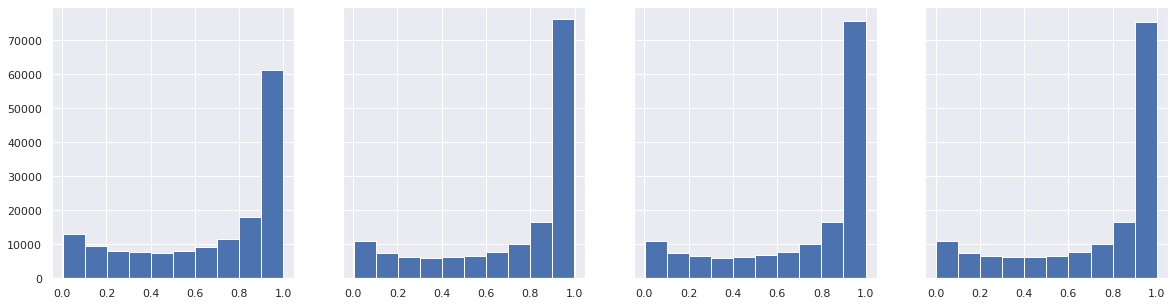

In [6]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(ncols=4, sharey=True)
df['pred_emo_orig'].hist(bins=10, ax=ax1)
df['pred_emo_paraphrased1'].hist(bins=10, ax=ax2)
df['pred_emo_paraphrased2'].hist(bins=10, ax=ax3)
df['pred_emo_paraphrased3'].hist(bins=10, ax=ax4)

In [7]:
df['orig_bucket'] = 'low'
df.loc[df['pred_formality_orig']>0.2,'orig_bucket'] = 'skip'
df.loc[df['pred_formality_orig']>0.4,'orig_bucket'] = 'mid'
df.loc[df['pred_formality_orig']>0.7,'orig_bucket'] = 'skip'
df.loc[df['pred_formality_orig']>0.9,'orig_bucket'] = 'high'

df['paraphrase_bucket1'] = 'low'
df.loc[df['pred_formality_paraphrased1']>0.2,'paraphrase_bucket1'] = 'skip'
df.loc[df['pred_formality_paraphrased1']>0.4,'paraphrase_bucket1'] = 'mid'
df.loc[df['pred_formality_paraphrased1']>0.7,'paraphrase_bucket1'] = 'skip'
df.loc[df['pred_formality_paraphrased1']>0.9,'paraphrase_bucket1'] = 'high'
df['paraphrase_bucket2'] = 'low'
df.loc[df['pred_formality_paraphrased2']>0.2,'paraphrase_bucket2'] = 'skip'
df.loc[df['pred_formality_paraphrased2']>0.4,'paraphrase_bucket2'] = 'mid'
df.loc[df['pred_formality_paraphrased2']>0.7,'paraphrase_bucket2'] = 'skip'
df.loc[df['pred_formality_paraphrased2']>0.9,'paraphrase_bucket2'] = 'high'
df['paraphrase_bucket3'] = 'low'
df.loc[df['pred_formality_paraphrased3']>0.2,'paraphrase_bucket3'] = 'skip'
df.loc[df['pred_formality_paraphrased3']>0.4,'paraphrase_bucket3'] = 'mid'
df.loc[df['pred_formality_paraphrased3']>0.7,'paraphrase_bucket3'] = 'skip'
df.loc[df['pred_formality_paraphrased3']>0.9,'paraphrase_bucket3'] = 'high'


<AxesSubplot:xlabel='paraphrase_bucket3', ylabel='Count'>

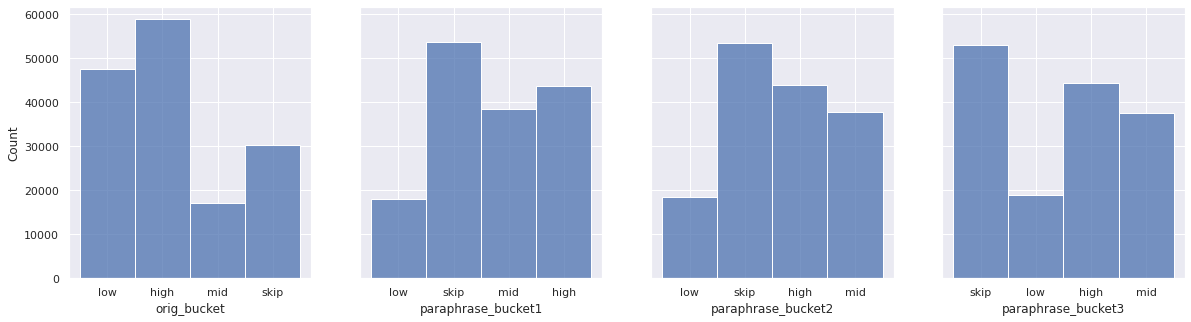

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.histplot(df, x="orig_bucket", ax=ax1)
sns.histplot(df, x="paraphrase_bucket1", ax=ax2)
sns.histplot(df, x="paraphrase_bucket2", ax=ax3)
sns.histplot(df, x="paraphrase_bucket3", ax=ax4)


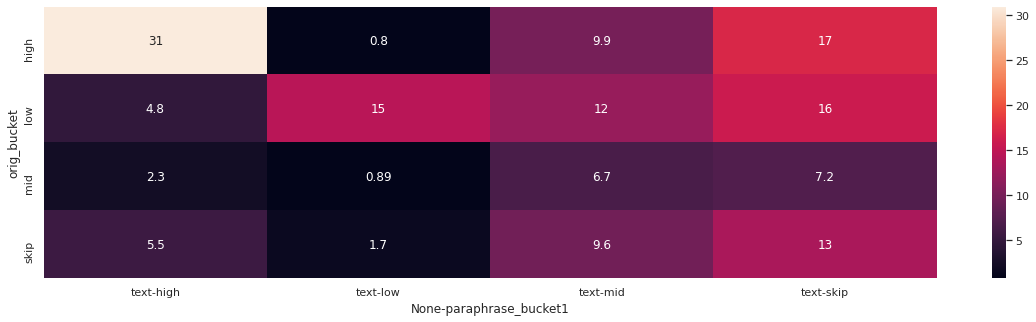

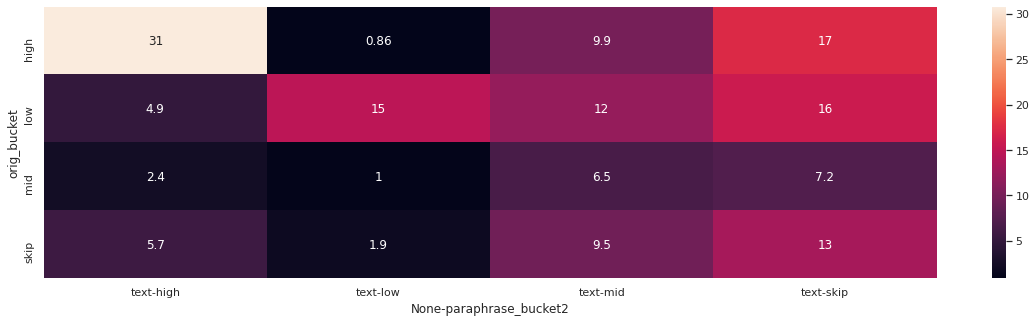

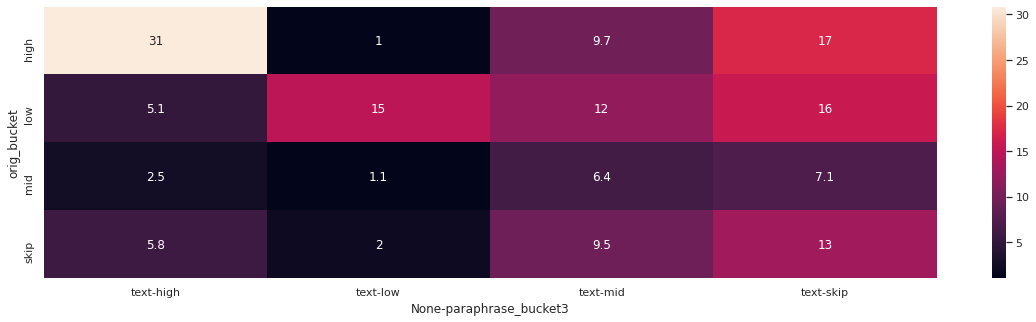

In [9]:
sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket1']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket1')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket2']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket2')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket3']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket3')/1000, annot=True)
plt.show()


In [10]:
df['orig_emo_bucket'] = 'low'
df.loc[df['pred_emo_orig']>0.25,'orig_emo_bucket'] = 'skip'
df.loc[df['pred_emo_orig']>0.4,'orig_emo_bucket'] = 'mid'
df.loc[df['pred_emo_orig']>0.7,'orig_emo_bucket'] = 'skip'
df.loc[df['pred_emo_orig']>0.9,'orig_emo_bucket'] = 'high'

df['paraphrase_emo_bucket1'] = 'low'
df.loc[df['pred_emo_paraphrased1']>0.25,'paraphrase_emo_bucket1'] = 'skip'
df.loc[df['pred_emo_paraphrased1']>0.4,'paraphrase_emo_bucket1'] = 'mid'
df.loc[df['pred_emo_paraphrased1']>0.7,'paraphrase_emo_bucket1'] = 'skip'
df.loc[df['pred_emo_paraphrased1']>0.9,'paraphrase_emo_bucket1'] = 'high'
df['paraphrase_emo_bucket2'] = 'low'
df.loc[df['pred_emo_paraphrased2']>0.25,'paraphrase_emo_bucket2'] = 'skip'
df.loc[df['pred_emo_paraphrased2']>0.4,'paraphrase_emo_bucket2'] = 'mid'
df.loc[df['pred_emo_paraphrased2']>0.7,'paraphrase_emo_bucket2'] = 'skip'
df.loc[df['pred_emo_paraphrased2']>0.9,'paraphrase_emo_bucket2'] = 'high'
df['paraphrase_emo_bucket3'] = 'low'
df.loc[df['pred_emo_paraphrased3']>0.25,'paraphrase_emo_bucket3'] = 'skip'
df.loc[df['pred_emo_paraphrased3']>0.4,'paraphrase_emo_bucket3'] = 'mid'
df.loc[df['pred_emo_paraphrased3']>0.7,'paraphrase_emo_bucket3'] = 'skip'
df.loc[df['pred_emo_paraphrased3']>0.9,'paraphrase_emo_bucket3'] = 'high'


<AxesSubplot:xlabel='paraphrase_emo_bucket3', ylabel='Count'>

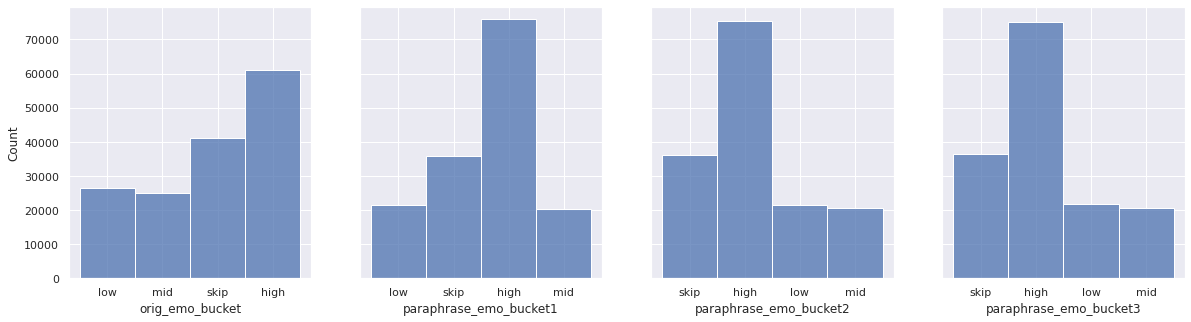

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.histplot(df, x="orig_emo_bucket", ax=ax1)
sns.histplot(df, x="paraphrase_emo_bucket1", ax=ax2)
sns.histplot(df, x="paraphrase_emo_bucket2", ax=ax3)
sns.histplot(df, x="paraphrase_emo_bucket3", ax=ax4)


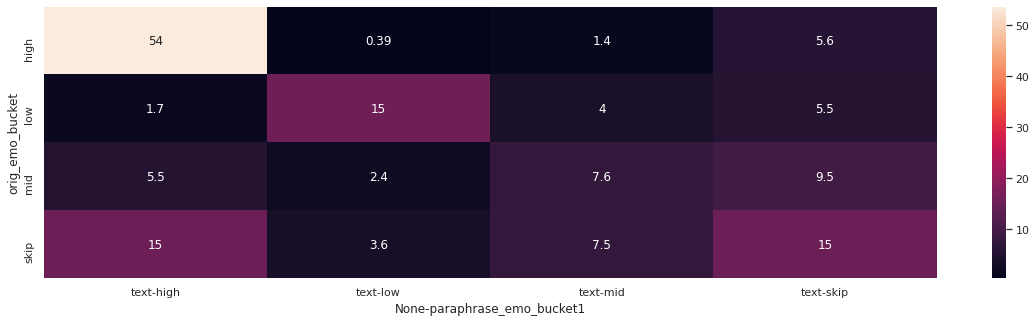

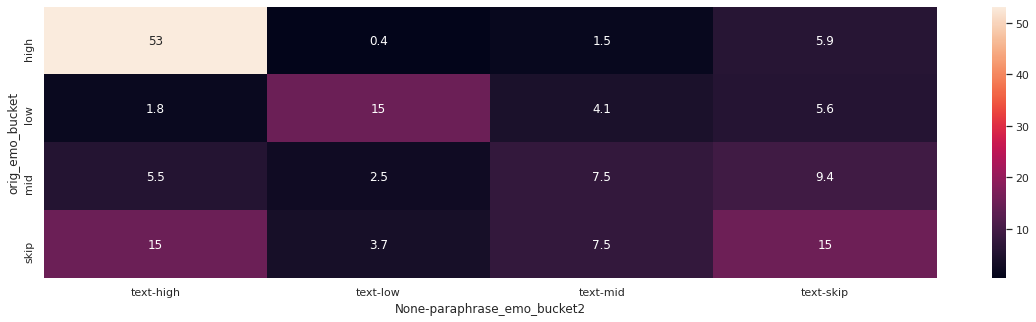

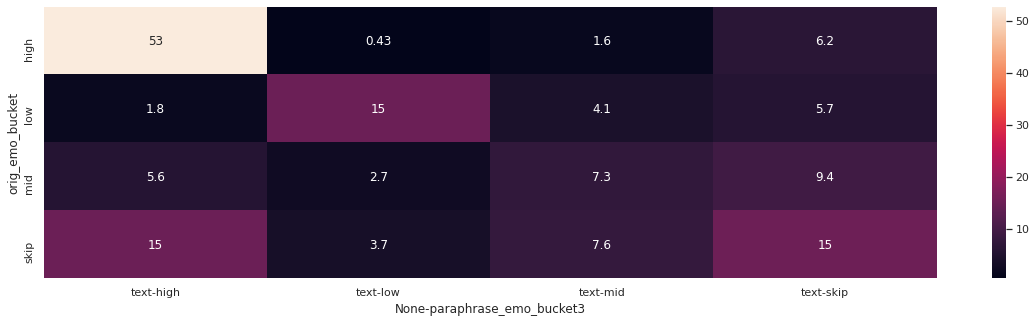

In [12]:
sns.heatmap(df.groupby(['orig_emo_bucket','paraphrase_emo_bucket1']).agg({'text': 'count'}).reset_index().pivot('orig_emo_bucket', 'paraphrase_emo_bucket1')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_emo_bucket','paraphrase_emo_bucket2']).agg({'text': 'count'}).reset_index().pivot('orig_emo_bucket', 'paraphrase_emo_bucket2')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_emo_bucket','paraphrase_emo_bucket3']).agg({'text': 'count'}).reset_index().pivot('orig_emo_bucket', 'paraphrase_emo_bucket3')/1000, annot=True)
plt.show()


In [13]:
df_p1 = df.filter(['paraphrased1','paraphrase_bucket1','paraphrase_emo_bucket1','text','orig_bucket','orig_emo_bucket'])
df_p1.columns = ['input','input_formality_bucket','input_emo_bucket','output','output_formality_bucket', 'output_emo_bucket']

df_p2 = df.filter(['paraphrased2','paraphrase_bucket2','paraphrase_emo_bucket2','text','orig_bucket','orig_emo_bucket'])
df_p2.columns = ['input','input_formality_bucket','input_emo_bucket','output','output_formality_bucket', 'output_emo_bucket']

df_p3 = df.filter(['paraphrased3','paraphrase_bucket3','paraphrase_emo_bucket3','text','orig_bucket','orig_emo_bucket'])
df_p3.columns = ['input','input_formality_bucket','input_emo_bucket','output','output_formality_bucket', 'output_emo_bucket']


In [14]:
df_fin = pd.concat([df_p1, df_p2, df_p3])

In [15]:
df_fin.shape, df_fin.columns

((460998, 6),
 Index(['input', 'input_formality_bucket', 'input_emo_bucket', 'output',
        'output_formality_bucket', 'output_emo_bucket'],
       dtype='object'))

In [16]:
df_fin[~((df_fin['input_formality_bucket']==df_fin['output_formality_bucket'])&(df_fin['input_emo_bucket']==df_fin['output_emo_bucket']))&~(df_fin['input_formality_bucket']=='skip')&~(df_fin['output_formality_bucket']=='skip')&~(df_fin['input_emo_bucket']=='skip')&~(df_fin['output_emo_bucket']=='skip')].shape

(64266, 6)

In [17]:
df_fin = df_fin[~((df_fin['input_formality_bucket']==df_fin['output_formality_bucket'])&(df_fin['input_emo_bucket']==df_fin['output_emo_bucket']))&~(df_fin['input_formality_bucket']=='skip')&~(df_fin['output_formality_bucket']=='skip')&~(df_fin['input_emo_bucket']=='skip')&~(df_fin['output_emo_bucket']=='skip')]

In [18]:
# Get the joint dataset pseudo
df_fin = df_fin.sample(frac=1).reset_index(drop=True)


In [19]:
train_samples = int(len(df_fin)*0.8)
train_df = df_fin[:train_samples]
dev_df = df_fin[train_samples:]
print(f"shuffled train size : {train_df.shape}, shuffled dev size : {dev_df.shape}")

shuffled train size : (51412, 6), shuffled dev size : (12854, 6)


In [20]:
train_df

,input,input_formality_bucket,input_emo_bucket,output,output_formality_bucket,output_emo_bucket
0,did Sonny Terry or Boy Williamson 2 be?,low,mid,Was that Sonny Terry or Sonny Boy Williamson 2?,mid,high
1,"you'll always sell candy at the school, or you...",mid,high,"You can always sell candy at your school, or y...",high,high
2,"if you really love him, he's yours.",mid,high,"If you truely love him, then he is all yours.",high,high
3,only one of Yellowcard's favorites.,mid,mid,My favorite to hear is Only One by Yellowcard.,high,mid
4,the other man would always fall back if he did...,mid,low,"If one of the men did not work out for me, the...",high,low
...,...,...,...,...,...,...
51407,"or can I say my favorite movie, quadrophenia -...",low,high,or can i say my fave movie - quadrophenia,low,mid
51408,this is Dr. Pepper's cream and cream.,high,high,This one about Dr. Pepper Barries and Cream lol,low,high
51409,"the songs are good, but the movie is good.",high,high,the songs are good but the actual movie is okay,low,high
51410,"she's not sure you're alive, so she's not sure...",mid,mid,so that there is no way she doesn't know you a...,mid,low


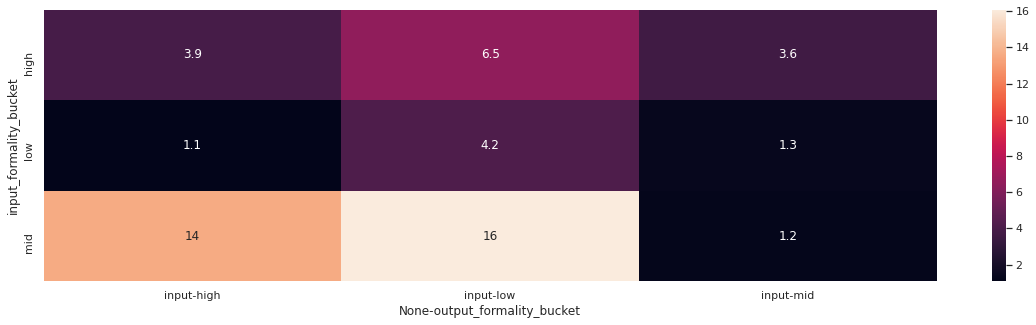

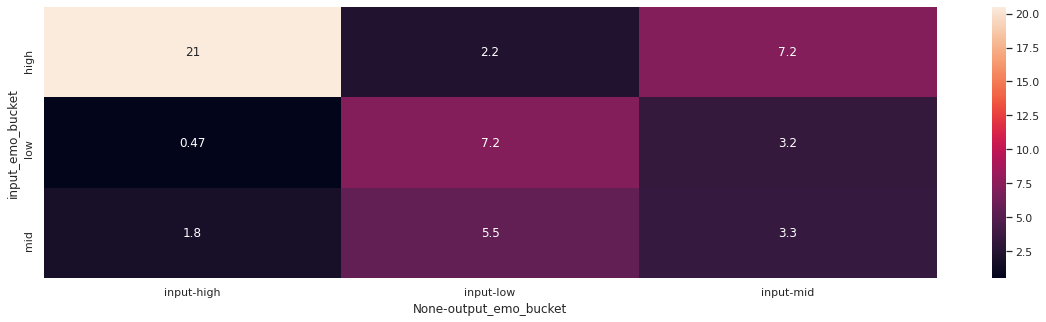

In [21]:
sns.heatmap(train_df.groupby(['input_formality_bucket','output_formality_bucket']).agg({'input': 'count'}).reset_index().pivot('input_formality_bucket', 'output_formality_bucket')/1000, annot=True)
plt.show()
sns.heatmap(train_df.groupby(['input_emo_bucket','output_emo_bucket']).agg({'input': 'count'}).reset_index().pivot('input_emo_bucket', 'output_emo_bucket')/1000, annot=True)
plt.show()


In [22]:
train_df.columns

Index(['input', 'input_formality_bucket', 'input_emo_bucket', 'output',
       'output_formality_bucket', 'output_emo_bucket'],
      dtype='object')

In [23]:
train_df_2 = train_df.filter(['output','output_formality_bucket', 'output_emo_bucket','input', 'input_formality_bucket', 'input_emo_bucket'])
train_df_2.columns = ['input', 'input_formality_bucket', 'input_emo_bucket', 'output', 'output_formality_bucket', 'output_emo_bucket']
dev_df_2 = dev_df.filter(['output','output_formality_bucket', 'output_emo_bucket','input', 'input_formality_bucket', 'input_emo_bucket'])
dev_df_2.columns = ['input', 'input_formality_bucket', 'input_emo_bucket', 'output', 'output_formality_bucket', 'output_emo_bucket']

train_df = pd.concat([train_df, train_df_2])
dev_df = pd.concat([dev_df, dev_df_2])
train_df= train_df.drop_duplicates()
dev_df= dev_df.drop_duplicates()
train_df.shape, dev_df.shape

((101668, 6), (25616, 6))

In [24]:
train_df.to_csv('../../data/pseudo/formality_joint/train.csv', header=False,index=False)
dev_df.to_csv('../../data/pseudo/formality_joint/dev.csv', header=False, index=False)

In [25]:
train_df = train_df.filter(['input', 'input_formality_bucket','output',
       'output_formality_bucket'])
dev_df = dev_df.filter(['input', 'input_formality_bucket','output',
       'output_formality_bucket'])

In [26]:
train_df = train_df[~(train_df['input_formality_bucket']==train_df['output_formality_bucket'])]
dev_df = dev_df[~(dev_df['input_formality_bucket']==dev_df['output_formality_bucket'])]

In [27]:
train_df.shape, dev_df.shape

((83376, 4), (20990, 4))

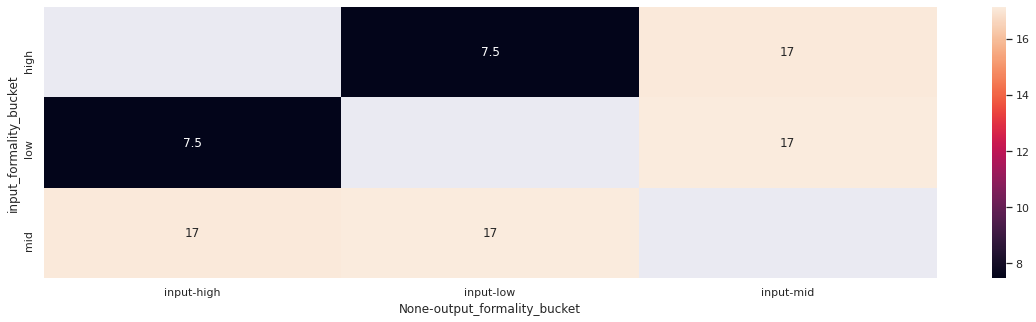

In [28]:
sns.heatmap(train_df.groupby(['input_formality_bucket','output_formality_bucket']).agg({'input': 'count'}).reset_index().pivot('input_formality_bucket', 'output_formality_bucket')/1000, annot=True)
plt.show()

In [29]:
train_df= train_df.drop_duplicates()
dev_df= dev_df.drop_duplicates()

In [30]:
train_df.shape, dev_df.shape

((83376, 4), (20990, 4))

In [31]:
train_df.to_csv('../../data/pseudo/formality/train.csv', header=False,index=False)
dev_df.to_csv('../../data/pseudo/formality/dev.csv', header=False, index=False)